## Loading feature matrix

In [1]:
import numpy as np
data_set = np.load("feature_matrix.npy")
label = np.load("label.npy")

In [2]:
data_set = data_set[:,:]

## Shuffling and creating train test set

In [3]:
from sklearn.utils import shuffle

In [4]:
X, Y = shuffle(data_set, label,random_state=42)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train_validation, X_test, y_train_validation, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)

X_train, X_validation, y_train, y_validation =  train_test_split(
    X_train_validation,y_train_validation, test_size = 0.25, random_state=42
)

# Implementing Naive Bayes to the dataset

In [7]:
from sklearn.naive_bayes import MultinomialNB

In [8]:
clf = MultinomialNB().fit(X_train,y_train)

In [9]:
clf.score(X_test,y_test)

0.84375

In [10]:
clf.score(X_train,y_train)

0.9614583333333333

In [11]:
clf_2 =  MultinomialNB().fit(X_train,y_train)
print(clf_2.score(X_test,y_test))
print(clf_2.score(X_validation,y_validation))

0.84375
0.85625


 ###   Let's see the confution Matrix

In [12]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

Confusion matrix
[[149   7]
 [ 43 121]]
Normalized confusion matrix
[[0.95512821 0.04487179]
 [0.26219512 0.73780488]]


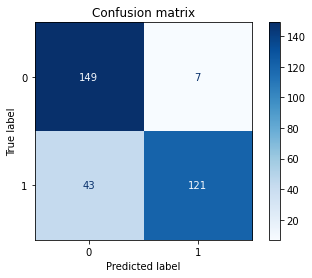

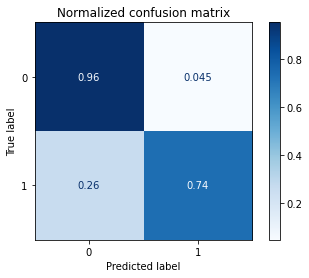

In [13]:
titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## F score Measurement

In [14]:
def F1_score_measurement(model, X_data, y_true, threshold):
    predicted_y_prob = model.predict_proba(X_data)
    predicted_y = predicted_y_prob[:,1]>threshold
    predicted_y = predicted_y*1

    tp=tn=fp=fn=0
    for i in range(0, len(predicted_y)):
        if(predicted_y[i]==0 and y_true[i] == 0):
            tn+=1
        if(predicted_y[i]==1 and y_true[i] == 1):
            tp+=1
        if(predicted_y[i]==0 and y_true[i] == 1):
            fn+=1
        if(predicted_y[i]==1 and y_true[i] == 0):
            fp+=1
    
    result = {}
    
    result["tn"]=tn
    result["fp"]=fp
    result["fn"]=fn
    result["tp"]=tp
    
    result["accuracy"]= (tn+tp)/(tn+fp+fn+tp)
    result["precision"]= tp/(tp+fp+0.00000000001)
    result["recall"] = tp/(tp+fn+0.0000000000001)
    result["F1_score"]= (2* result["precision"]*result["recall"])/(result["precision"]+result["recall"]+0.000000001)
    
    return result
        

In [15]:
model =  MultinomialNB()
model.fit(X_train,y_train)
for i in np.linspace(0,1,100):
    res=F1_score_measurement(model,X_test,y_test,i)
    print("Threshold = ", i*1.0, " F1_score = ", res["F1_score"])

Threshold =  0.0  F1_score =  0.6776859499651521
Threshold =  0.010101010101010102  F1_score =  0.6776859499651521
Threshold =  0.020202020202020204  F1_score =  0.6776859499651521
Threshold =  0.030303030303030304  F1_score =  0.6776859499651521
Threshold =  0.04040404040404041  F1_score =  0.6776859499651521
Threshold =  0.05050505050505051  F1_score =  0.6776859499651521
Threshold =  0.06060606060606061  F1_score =  0.6776859499651521
Threshold =  0.07070707070707072  F1_score =  0.6776859499651521
Threshold =  0.08080808080808081  F1_score =  0.6776859499651521
Threshold =  0.09090909090909091  F1_score =  0.6776859499651521
Threshold =  0.10101010101010102  F1_score =  0.6790890264665916
Threshold =  0.11111111111111112  F1_score =  0.6790890264665916
Threshold =  0.12121212121212122  F1_score =  0.6790890264665916
Threshold =  0.13131313131313133  F1_score =  0.6790890264665916
Threshold =  0.14141414141414144  F1_score =  0.6790890264665916
Threshold =  0.15151515151515152  F1_s

## ROC Curve Drawing

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [17]:
def draw_ROC(model, x_data, y_true):

    #No skill probabilities
    ns_probs = [0 for _ in range(len(y_true))]

    # predict probabilities
    lr_probs = model.predict_proba(x_data)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(y_true, ns_probs)
    lr_auc = roc_auc_score(y_true, lr_probs)

    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Naive Bayes: ROC AUC=%.3f' % (lr_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_true, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_true, lr_probs)

    # plot the roc curve for the model
    plt.figure(dpi=1000)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.944


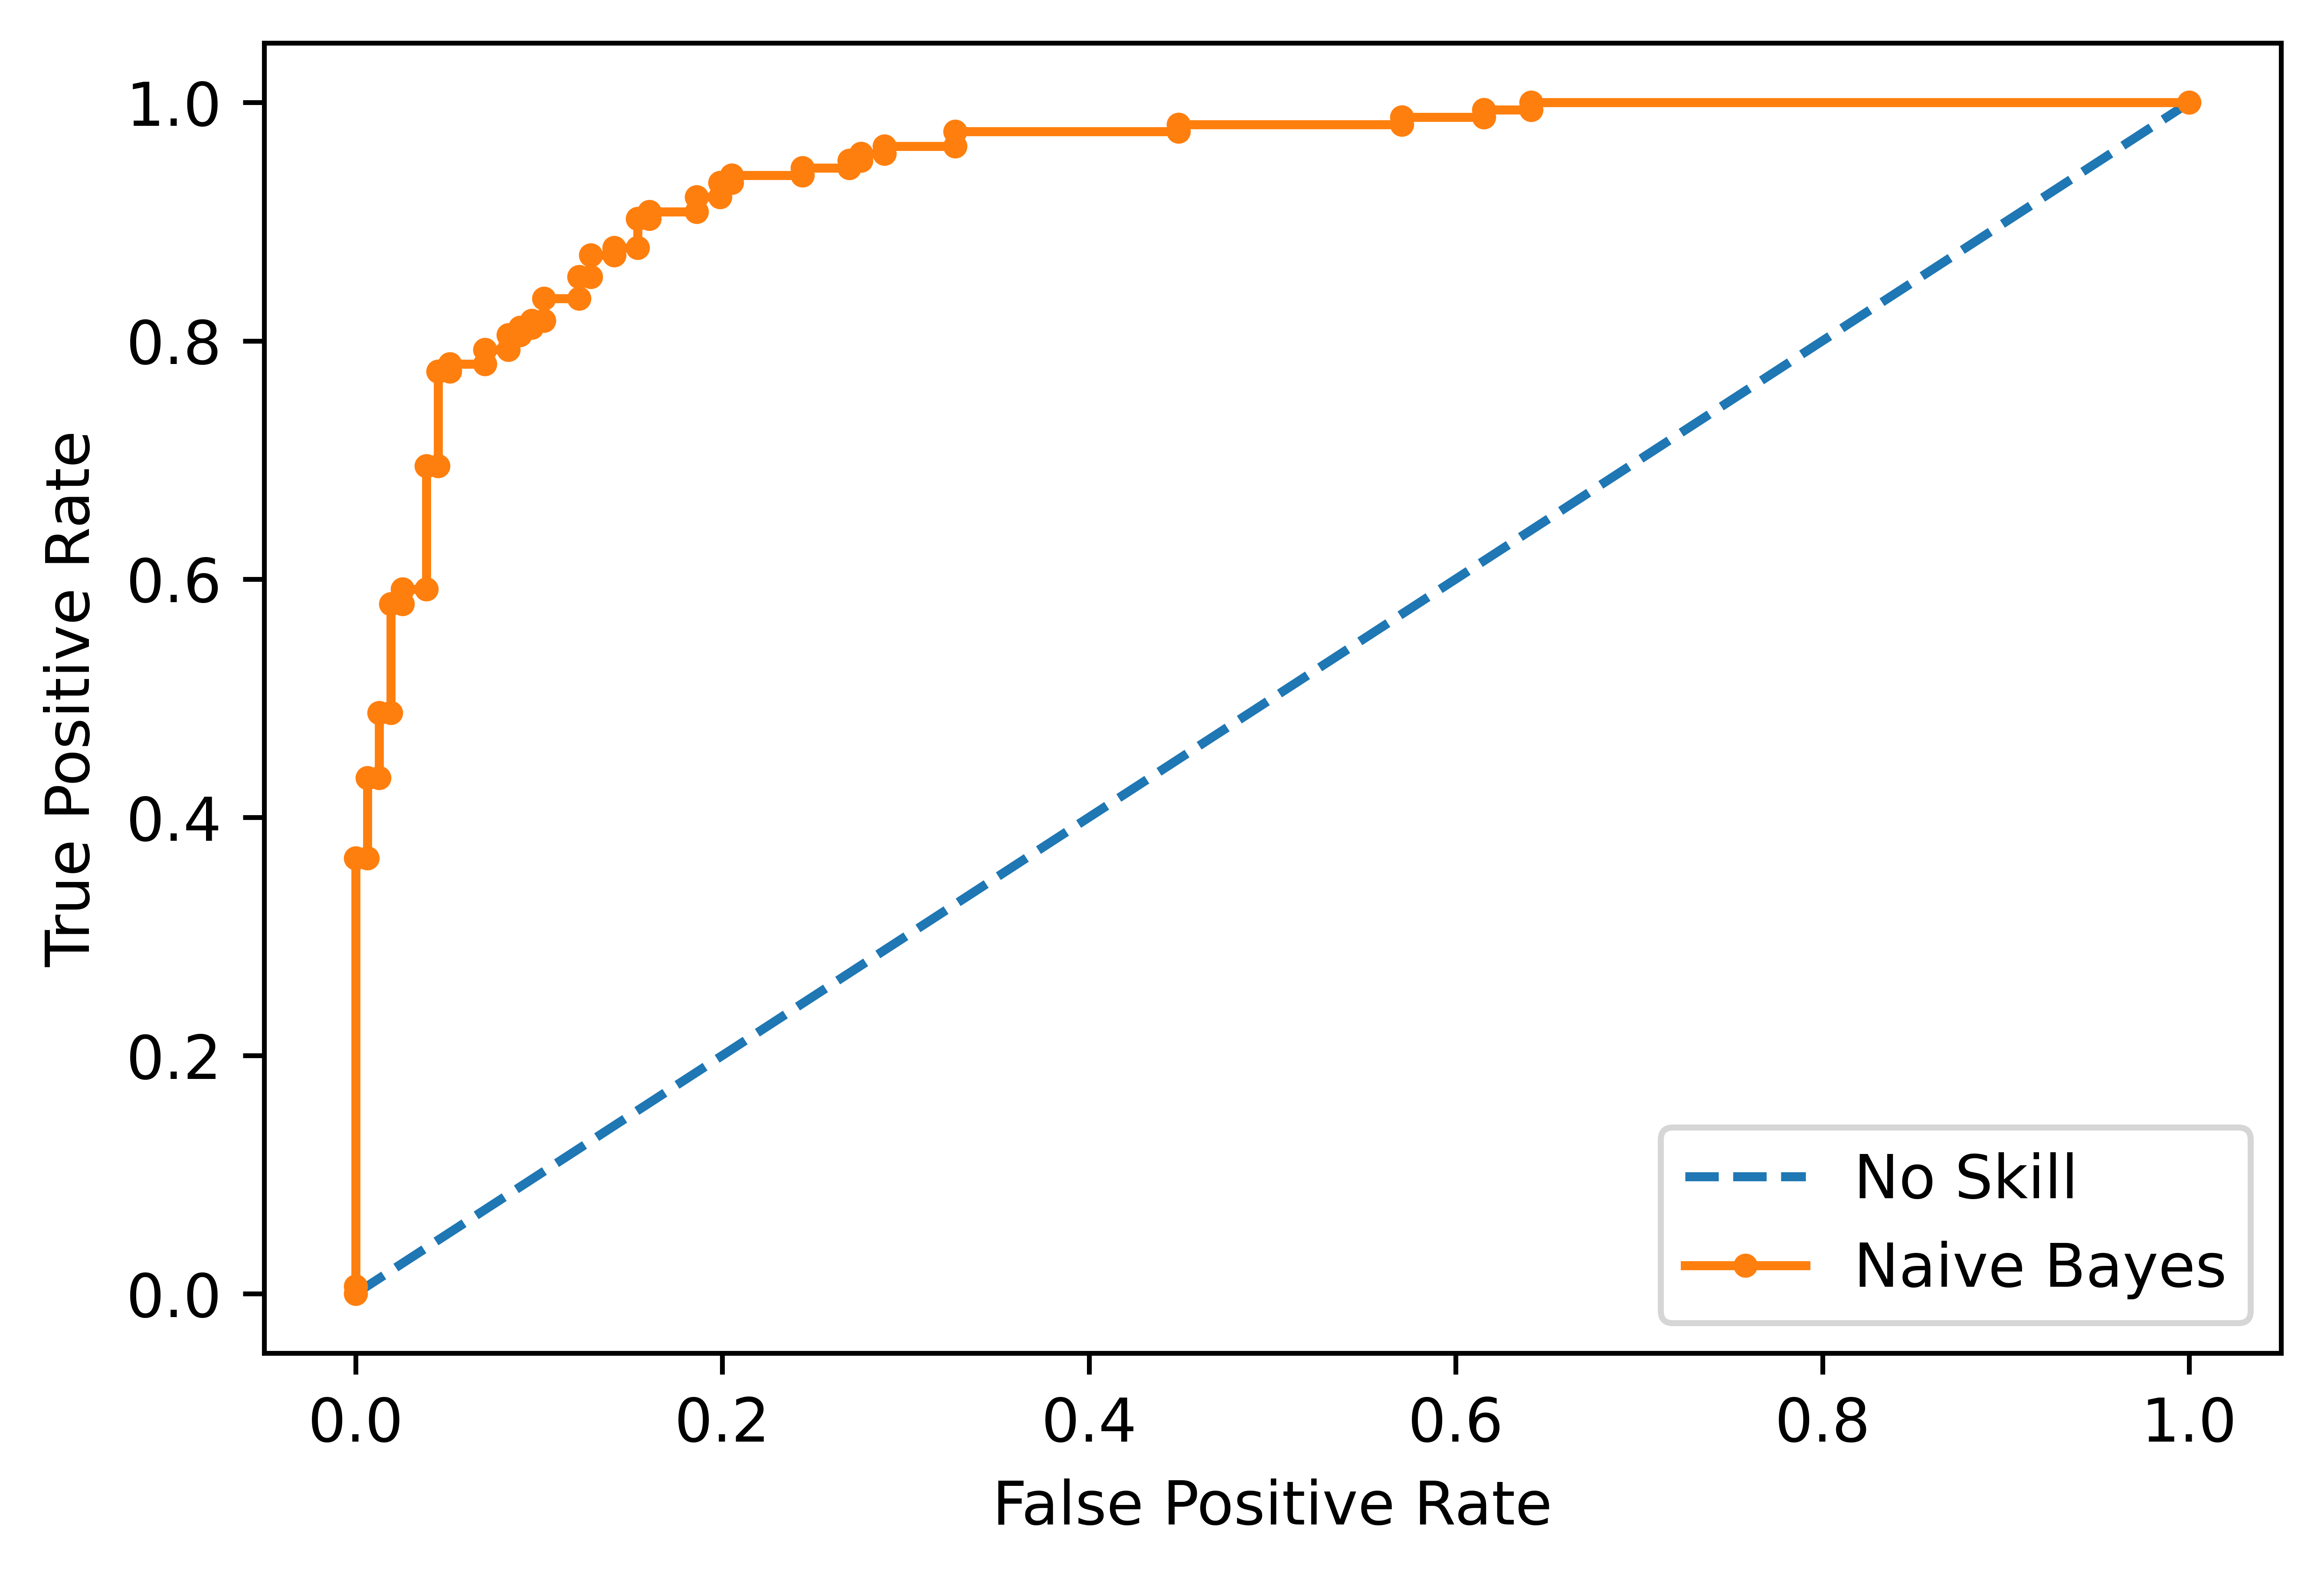

In [18]:
draw_ROC(model,X_test,y_test)

In [19]:
print(sum(y_test))
len(y_test)

164


320

In [20]:
F1_score_measurement(model,X_test, y_test,0.5)

{'tn': 149,
 'fp': 7,
 'fn': 43,
 'tp': 121,
 'accuracy': 0.84375,
 'precision': 0.9453124999999262,
 'recall': 0.7378048780487799,
 'F1_score': 0.8287671227952423}

Confusion matrix
[[149   7]
 [ 43 121]]


<Figure size 3600x2400 with 0 Axes>

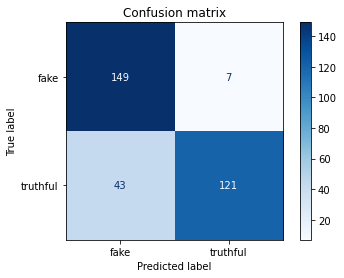

In [21]:
plt.figure(dpi=600)
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["fake","truthful"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.savefig("conmat_nb.png",dpi=600)
plt.show()